## Team Member:-
## 1) Chinmay Bhat
## 2) Sanket Takle

### Loading Libraries

In [48]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix , auc , precision_score , recall_score , f1_score

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D ,MaxPooling2D , Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip , RandomRotation , Rescaling , Resizing
from tensorflow.keras.metrics import Precision , Recall  , AUC

from sklearn.model_selection import train_test_split
import os

In [2]:
filenames = os.listdir("train")
filenames

['normal', 'potholes']

In [3]:
from tqdm import tqdm
import cv2 
def make_train_data(label,DIR):
    for img in tqdm(os.listdir(DIR)):
        try:
            path = os.path.join(DIR,img)
            img = cv2.imread(path,cv2.IMREAD_COLOR)
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

            X.append(np.array(img))
            Z.append(str(label))
        except:
            pass
        
def assign_label(img,label):
    return label

In [4]:
X=[]
Z=[]
IMG_SIZE=256
Plain='train/Normal'
Pothole='train/Pothole'

make_train_data('Plain',Plain)
make_train_data('Pothole',Pothole)

100%|██████████| 328/328 [00:10<00:00, 31.71it/s]


### Taking a look at the images in the dataset 

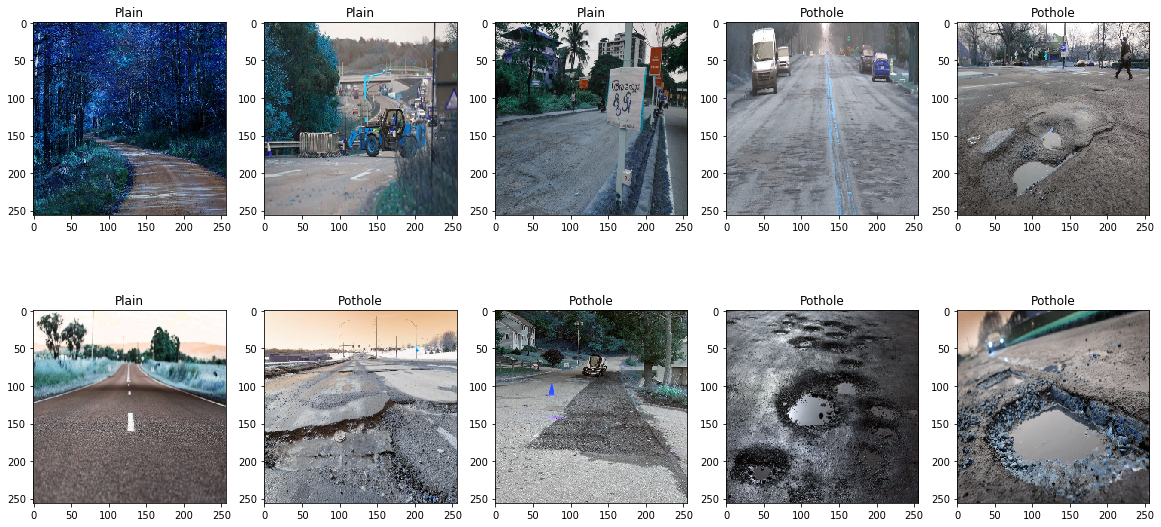

In [5]:
import random as rn
fig,ax=plt.subplots(2,5)
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
fig.set_size_inches(20,20)

for i in range(2):
    for j in range (5):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l][:])
        ax[i,j].set_title(Z[l])
        ax[i,j].set_aspect('equal')

### Encoding the Images and spliting them into train and test set

In [6]:
le = LabelEncoder()
Y  = le.fit_transform(Z)
Y  = to_categorical(Y)
X  = np.array(X)

new_Y = []
for each in Y :
    new_Y.append(each[0])
    
x_train,x_test,y_train,y_test = train_test_split(X,np.array(new_Y),test_size=0.25,random_state=42)

### Core CNN 

In [7]:
CNN_model = Sequential()

# Adding all the layers 
CNN_model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(256,256,3)))
CNN_model.add(MaxPooling2D(pool_size=2))
CNN_model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
CNN_model.add(MaxPooling2D(pool_size=2))
CNN_model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
CNN_model.add(MaxPooling2D(pool_size=2))
CNN_model.add(Flatten())
CNN_model.add(Dense(500,activation="relu"))
CNN_model.add(Dense(1,activation="sigmoid"))

# finalizing the model 
CNN_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Taking a final look at all the layers of the model 
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 65536)             0

In [8]:
CNN_History = CNN_model.fit(x_train, y_train, epochs = 10, validation_data=(x_test,y_test) )

Epoch 1/10
16/16 [==============================] - 20s 1s/step - loss: 250.3902 - accuracy: 0.6110 - val_loss: 0.7824 - val_accuracy: 0.8706
Epoch 2/10
16/16 [==============================] - 19s 1s/step - loss: 0.5155 - accuracy: 0.8880 - val_loss: 0.5759 - val_accuracy: 0.8882
Epoch 3/10
16/16 [==============================] - 19s 1s/step - loss: 0.2398 - accuracy: 0.9450 - val_loss: 0.3106 - val_accuracy: 0.9235
Epoch 4/10
16/16 [==============================] - 19s 1s/step - loss: 0.0438 - accuracy: 0.9784 - val_loss: 0.3243 - val_accuracy: 0.9235
Epoch 5/10
16/16 [==============================] - 19s 1s/step - loss: 0.0144 - accuracy: 0.9941 - val_loss: 0.3705 - val_accuracy: 0.9235
Epoch 6/10
16/16 [==============================] - 19s 1s/step - loss: 0.0085 - accuracy: 0.9980 - val_loss: 0.3600 - val_accuracy: 0.9118
Epoch 7/10
16/16 [==============================] - 19s 1s/step - loss: 0.0052 - accuracy: 0.9980 - val_loss: 0.3729 - val_accuracy: 0.9176
Epoch 8/10
16/16 [

In [9]:
CNN_model.save('Model_Core_CNN.h5')

In [42]:
y_pred = CNN_model.predict_classes(x_test)

In [63]:
cm = confusion_matrix(y_test , y_pred)
print(cm)

[[66  5]
 [11 88]]


In [64]:
class_report = classification_report(y_test , y_pred)
print(class_report)

              precision    recall  f1-score   support

         0.0       0.86      0.93      0.89        71
         1.0       0.95      0.89      0.92        99

    accuracy                           0.91       170
   macro avg       0.90      0.91      0.90       170
weighted avg       0.91      0.91      0.91       170



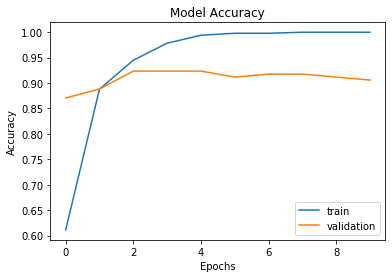

In [66]:
plt.plot(CNN_History.history['accuracy'])
plt.plot(CNN_History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

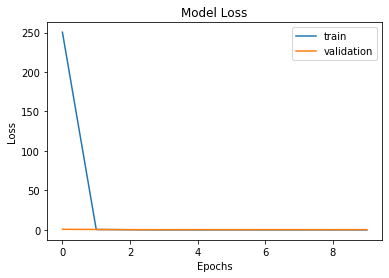

In [67]:
plt.plot(CNN_History.history['loss'])
plt.plot(CNN_History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()


### Transfer Learning using VGG19

In [68]:
Base_model_vgg = VGG19(include_top=False , weights='imagenet' ,input_shape=[IMG_SIZE , IMG_SIZE]+[3])
for layer in Base_model_vgg.layers:
    layer.trainable=False

In [69]:
Transfer_learn_model = Sequential()
# building the model 
Transfer_learn_model.add(Base_model_vgg)
Transfer_learn_model.add(Flatten())
Transfer_learn_model.add(Dense(500,activation="relu"))
Transfer_learn_model.add(Dense(1,activation="sigmoid"))

# finalizing the model 
Transfer_learn_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Taking a final look at all the layers of the model 
Transfer_learn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 8, 8, 512)         20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               16384500  
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 501       
Total params: 36,409,385
Trainable params: 16,385,001
Non-trainable params: 20,024,384
_________________________________________________________________


In [71]:
Transfer_learn_History = Transfer_learn_model.fit(x_train, y_train, epochs = 5, validation_data=(x_test,y_test) )

Epoch 1/5
16/16 [==============================] - 337s 21s/step - loss: 0.1146 - accuracy: 0.9941 - val_loss: 3.3836 - val_accuracy: 0.9647
Epoch 2/5
16/16 [==============================] - 337s 21s/step - loss: 4.3676e-06 - accuracy: 1.0000 - val_loss: 4.1312 - val_accuracy: 0.9529
Epoch 3/5
16/16 [==============================] - 337s 21s/step - loss: 0.0075 - accuracy: 0.9980 - val_loss: 3.0124 - val_accuracy: 0.9647
Epoch 4/5
16/16 [==============================] - 337s 21s/step - loss: 1.8417e-21 - accuracy: 1.0000 - val_loss: 2.9181 - val_accuracy: 0.9706
Epoch 5/5
16/16 [==============================] - 337s 21s/step - loss: 2.7713e-24 - accuracy: 1.0000 - val_loss: 2.9116 - val_accuracy: 0.9706


In [72]:
Transfer_learn_model.save('Model_Transfer_learn_VGG19.h5')

In [73]:
y_pred_transfer_learn = Transfer_learn_model.predict_classes(x_test)

In [74]:
cm_transfer_learn = confusion_matrix(y_test , y_pred_transfer_learn)
print(cm_transfer_learn)

[[68  3]
 [ 2 97]]


In [75]:
class_report_transfer_learn = classification_report(y_test , y_pred_transfer_learn)
print(class_report_transfer_learn)

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.96        71
         1.0       0.97      0.98      0.97        99

    accuracy                           0.97       170
   macro avg       0.97      0.97      0.97       170
weighted avg       0.97      0.97      0.97       170



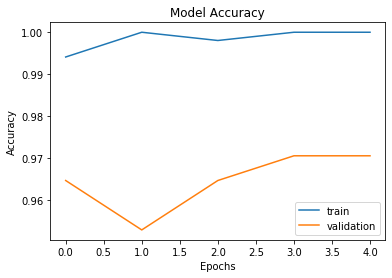

In [76]:
plt.plot(Transfer_learn_History.history['accuracy'])
plt.plot(Transfer_learn_History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

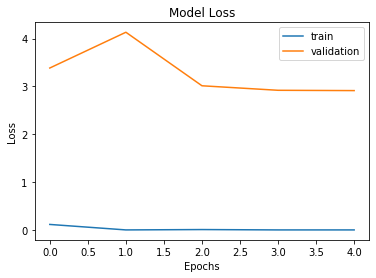

In [77]:
plt.plot(Transfer_learn_History.history['loss'])
plt.plot(Transfer_learn_History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

### With Data Augmentation and Fine Tunning

In [78]:
# Resizing and rescaling 
resize_and_rescale = Sequential([
  Resizing(IMG_SIZE, IMG_SIZE),
  Rescaling(1./255)
])

# horizontal flips and rotation 
data_augmentation = Sequential([
  RandomFlip("horizontal_and_vertical"),
  RandomRotation(0.2),
])

In [79]:
Base_model_Vgg = VGG19(include_top=False , weights='imagenet' ,input_shape=[IMG_SIZE , IMG_SIZE]+[3])
for layer in Base_model_Vgg.layers:
    layer.trainable=False

In [80]:
Transfer_learn_model_Vgg = Sequential()
callback = EarlyStopping(monitor='accuracy', patience=3 , restore_best_weights=True)
# building the model 
Transfer_learn_model_Vgg.add(resize_and_rescale)
Transfer_learn_model_Vgg.add(data_augmentation)
Transfer_learn_model_Vgg.add(Base_model_Vgg)
Transfer_learn_model_Vgg.add(Dropout(0.2))
Transfer_learn_model_Vgg.add(Flatten())
Transfer_learn_model_Vgg.add(Dense(500,activation="relu"))
Transfer_learn_model_Vgg.add(Dense(1,activation="sigmoid"))

# finalizing the model 
Transfer_learn_model_Vgg.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy' , 'Precision' , 'Recall'  , 'AUC'])

In [82]:
Transfer_learn_Vgg_History = Transfer_learn_model_Vgg.fit(x_train, y_train, epochs = 20, validation_data=(x_test,y_test) , callbacks=[callback])

Epoch 1/20
16/16 [==============================] - 350s 22s/step - loss: 4.0484 - accuracy: 0.5678 - precision: 0.5645 - recall: 0.5556 - auc: 0.6190 - val_loss: 1.2072 - val_accuracy: 0.5412 - val_precision: 1.0000 - val_recall: 0.2121 - val_auc: 0.9207
Epoch 2/20
16/16 [==============================] - 339s 21s/step - loss: 0.4009 - accuracy: 0.8369 - precision: 0.8314 - recall: 0.8413 - auc: 0.9158 - val_loss: 0.4020 - val_accuracy: 0.8588 - val_precision: 0.9518 - val_recall: 0.7980 - val_auc: 0.9575
Epoch 3/20
16/16 [==============================] - 339s 21s/step - loss: 0.2308 - accuracy: 0.9194 - precision: 0.9203 - recall: 0.9167 - auc: 0.9660 - val_loss: 0.2552 - val_accuracy: 0.8882 - val_precision: 0.9000 - val_recall: 0.9091 - val_auc: 0.9637
Epoch 4/20
16/16 [==============================] - 339s 21s/step - loss: 0.1744 - accuracy: 0.9273 - precision: 0.9283 - recall: 0.9246 - auc: 0.9807 - val_loss: 0.2498 - val_accuracy: 0.9353 - val_precision: 0.9074 - val_recall: 0

In [83]:
# Taking a final look at all the layers of the model 
Transfer_learn_model_Vgg.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 256, 256, 3)       0         
_________________________________________________________________
sequential_3 (Sequential)    (None, 256, 256, 3)       0         
_________________________________________________________________
vgg19 (Functional)           (None, 8, 8, 512)         20024384  
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 512)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 500)               16384500  
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [89]:
Transfer_learn_model_Vgg.save('Model_Transfer_learn_Vgg_data_augment.h5')

In [85]:
y_pred_transfer_learn_data_augment = Transfer_learn_model_Vgg.predict_classes(x_test)

In [88]:
cm_transfer_learn_data_augment = confusion_matrix(y_test , y_pred_transfer_learn_data_augment)
print(cm_transfer_learn_data_augment)

[[66  5]
 [11 88]]


In [90]:
class_report__transfer_learn_data_augment = classification_report(y_test , y_pred_transfer_learn_data_augment)
print(class_report__transfer_learn_data_augment)

              precision    recall  f1-score   support

         0.0       0.86      0.93      0.89        71
         1.0       0.95      0.89      0.92        99

    accuracy                           0.91       170
   macro avg       0.90      0.91      0.90       170
weighted avg       0.91      0.91      0.91       170



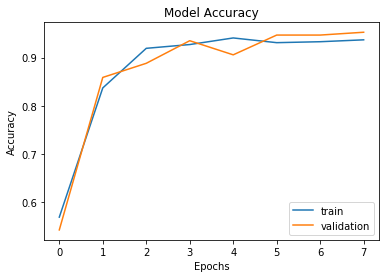

In [91]:
plt.plot(Transfer_learn_Vgg_History.history['accuracy'])
plt.plot(Transfer_learn_Vgg_History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

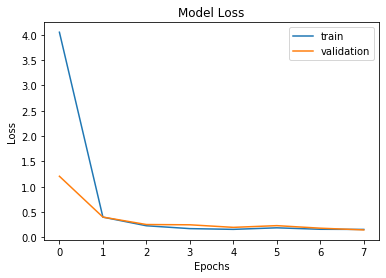

In [92]:
plt.plot(Transfer_learn_Vgg_History.history['loss'])
plt.plot(Transfer_learn_Vgg_History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

### Validating using different models 

In [94]:
path  = 'validation'
files = os.listdir(path)

  0%|          | 0/7 [00:00<?, ?it/s]

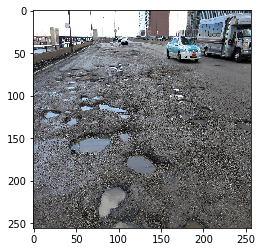

 14%|█▍        | 1/7 [00:00<00:05,  1.17it/s]

Pothole Road


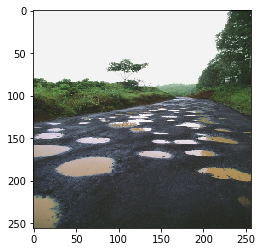

 29%|██▊       | 2/7 [00:01<00:04,  1.09it/s]

Plain Road


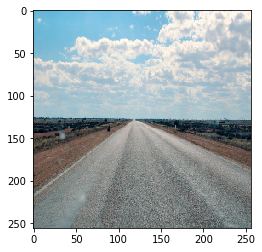

 43%|████▎     | 3/7 [00:02<00:03,  1.10it/s]

Plain Road


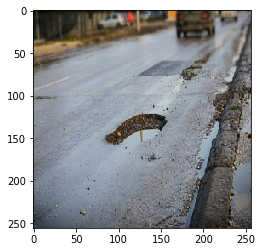

 57%|█████▋    | 4/7 [00:03<00:02,  1.10it/s]

Pothole Road


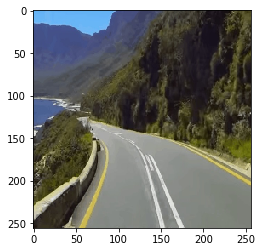

 71%|███████▏  | 5/7 [00:04<00:01,  1.04it/s]

Plain Road


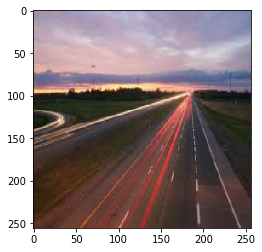

 86%|████████▌ | 6/7 [00:05<00:00,  1.07it/s]

Plain Road


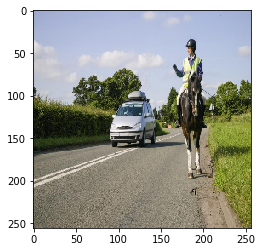

100%|██████████| 7/7 [00:06<00:00,  1.03it/s]

Plain Road


In [96]:
for i in tqdm(files):
    pth = os.path.join(path,i)
    X = cv2.imread(pth,cv2.IMREAD_COLOR)
    X = cv2.resize(X,(256,256))
    plt.figure()
    plt.imshow(X[:,:,::-1]) 
    plt.show()  

    X = np.array(X)
    X = np.expand_dims(X, axis=0)

    y_pred = np.round(Transfer_learn_model_Vgg.predict(X))
    if y_pred[0][0] == 1:
        print("Plain Road")
    else:
        print("Pothole Road")

### Deployement 
This is a tkinter .py file which is to be converted into .exe file for deployement using pyinstaller

In [97]:
class Pothole_detect :
    
    def __init__(self) :
        
        # importing the library
        from tkinter import  Tk , Button , messagebox , StringVar , Entry , font , PhotoImage ,Label 
        from PIL import Image, ImageTk
        from tkinter.filedialog import askopenfile 
        from tensorflow.keras.models import load_model
        from tensorflow.keras.preprocessing import image
        from tensorflow.keras.applications.vgg16 import preprocess_input
        import numpy as np 
        import cv2
        
        # defining the functions 
        def select():
            
            messagebox.showinfo('Select' , 'Select the Image to be Checked' )
            file = askopenfile(title='Please select one (any) frame from your set of images.',
                           filetypes=[('Image Files', ['.jpeg', '.jpg', '.png', '.gif',
                                                       '.tiff', '.tif', '.bmp'])])
            path_holder.insert(0 ,file.name)
            load = Image.open(f'{file.name}')
            load = load.resize((300 , 300))
            render = ImageTk.PhotoImage(load)
            picture_display.config(image=render)
            picture_display.image = render
            picture_display.place(x=100, y=100)

            
        def detect():
            
            model = load_model('Model_Core_CNN.h5')
            X = cv2.imread(path_holder_varibale.get(),cv2.IMREAD_COLOR)
            X = cv2.resize(X,(256,256))
            """ plt.figure()
            plt.imshow(X[:,:,::-1]) 
            plt.show()"""  

            X = np.array(X)
            X = np.expand_dims(X, axis=0)

            y_pred = np.round(model.predict(X))
            if y_pred[0][0] == 1:
                print("Plain Road")
                messagebox.showinfo('Select' , 'This Image is of Plain Road' )

            else:
                print("Pothole Road")
                messagebox.showinfo('Select' , 'This Image contains  Potholes' )


        
        # initializing the window
        Main_window = Tk()
        Main_window.geometry('510x500')
        Main_window.title('Pothole Detection App ')
        
        # designing the window
        fontStyle = font.Font( size=14)
        select_image_button = Button(Main_window , text = 'Select' , command = select , font = fontStyle , width = 10).place(x = 100  , y = 25)
        detect_image_button = Button(Main_window , text = 'Detect' , command = detect , font = fontStyle , width = 10).place(x = 255 , y = 25)
        
        picture_display = Label(Main_window , text = '< Image to be Displayed >' , font = fontStyle)
        picture_display.place(x = 100 , y = 100)
        
        path_holder_varibale = StringVar()
        path_holder = Entry(Main_window , textvariable = path_holder_varibale , font = fontStyle , width = 25)
        path_holder.place(x = 100 , y = 450)
        Main_window.mainloop()

In [100]:
pothole = Pothole_detect()

Pothole Road
